In [1]:
# Re-import required libraries after environment reset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:

# Re-define the IOB loader for a single sample file
def load_iob_sample(file_path):
    sentences = []
    labels = []
    current_sentence = []
    current_labels = []

    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            if not line:
                if current_sentence:
                    sentences.append(current_sentence)
                    labels.append(current_labels)
                    current_sentence, current_labels = [], []
                continue
            parts = line.split()
            if len(parts) == 2:
                word, label = parts
                current_sentence.append(word)
                current_labels.append(label)
    
    return sentences, labels


In [3]:

# Load sample data
sample_file_path = "AnchorNER_all/AA.txt"
sample_sentences, sample_labels = load_iob_sample(sample_file_path)

# Flatten labels for analysis
flat_labels = [label for sent in sample_labels for label in sent]
label_counts = Counter(flat_labels)
sentence_lengths = [len(s) for s in sample_sentences]


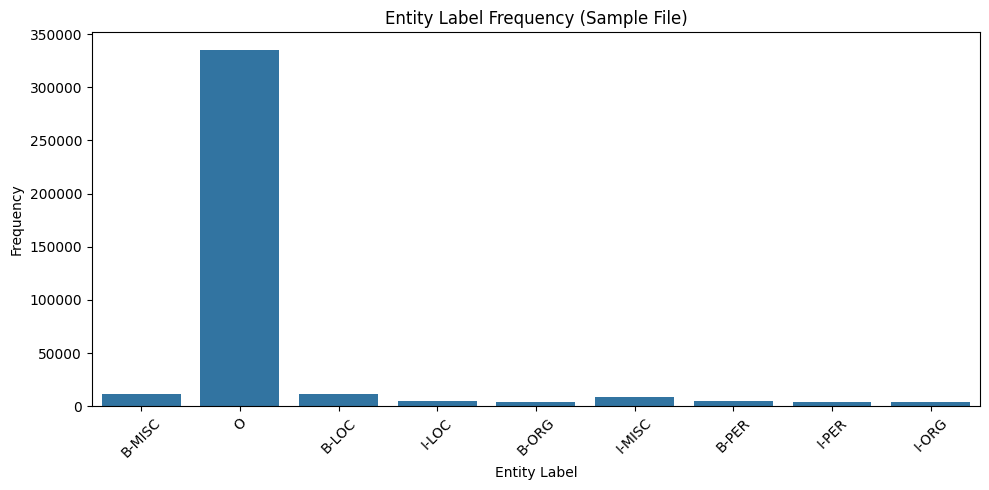

In [ ]:
# Plot 1: Entity label distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Entity Label Frequency (Sample File)")
plt.xlabel("Entity Label")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

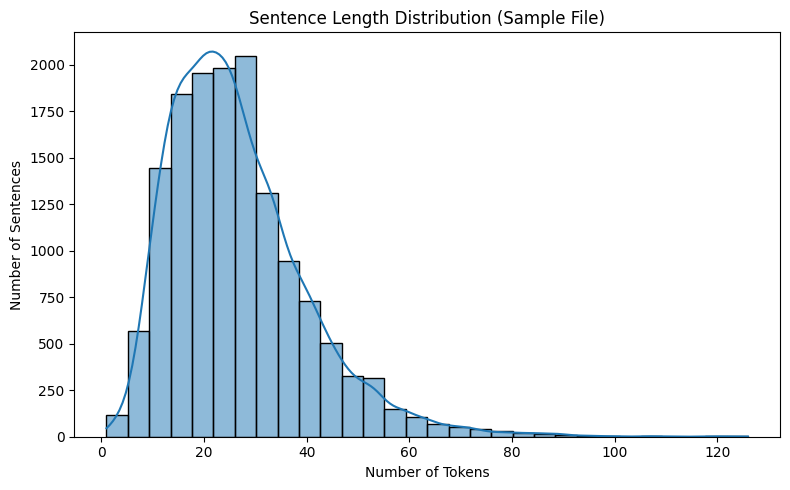

In [5]:

# Plot 2: Sentence length distribution
plt.figure(figsize=(8, 5))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.title("Sentence Length Distribution (Sample File)")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Sentences")
plt.tight_layout()
plt.show()


In [6]:

# Preview a few annotated sentence-label pairs
sample_preview = []
for words, tags in zip(sample_sentences[:5], sample_labels[:5]):
    sample_preview.append(list(zip(words, tags)))

sample_preview


[[('Chaparral', 'B-MISC'),
  ('is', 'O'),
  ('a', 'O'),
  ('shrubland', 'O'),
  ('or', 'O'),
  ('heathland', 'O'),
  ('plant', 'O'),
  ('community', 'O'),
  ('found', 'O'),
  ('primarily', 'O'),
  ('in', 'O'),
  ('the', 'O'),
  ('U.S.', 'B-LOC'),
  ('state', 'O'),
  ('of', 'O'),
  ('California', 'B-LOC'),
  ('and', 'O'),
  ('in', 'O'),
  ('the', 'O'),
  ('northern', 'O'),
  ('portion', 'O'),
  ('of', 'O'),
  ('the', 'O'),
  ('Baja', 'B-LOC'),
  ('California', 'I-LOC'),
  ('Peninsula', 'I-LOC'),
  (',', 'O'),
  ('Mexico', 'B-LOC'),
  ('.', 'O')],
 [('It', 'O'),
  ('is', 'O'),
  ('shaped', 'O'),
  ('by', 'O'),
  ('a', 'O'),
  ('Mediterranean', 'B-MISC'),
  ('climate', 'O'),
  ('(', 'O'),
  ('mild', 'O'),
  (',', 'O'),
  ('wet', 'O'),
  ('winters', 'O'),
  ('and', 'O'),
  ('hot', 'O'),
  ('dry', 'O'),
  ('summers', 'O'),
  (')', 'O'),
  ('and', 'O'),
  ('wildfire', 'O'),
  (',', 'O'),
  ('featuring', 'O'),
  ('summer', 'O'),
  ('-', 'O'),
  ('drought', 'O'),
  ('-', 'O'),
  ('tolerant', '